In [14]:
%matplotlib inline

I used this file to understand how it works, to understand the use of matplotlib and mainly the Conv2D.

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
plt.rcParams['figure.figsize'] = (7, 7)  # Make the figures a bit bigger

nb_classes = 10

In [3]:
# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


In [4]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [6]:
img_rows, img_cols = 28, 28
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [8]:
model = Sequential()
model.add(Conv2D(32, activation='relu', 
                 kernel_size=(4,4), 
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probability distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [9]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,
          metrics=['accuracy'])

In [10]:
model.fit(X_train, Y_train,
          batch_size=256, epochs=20,
          verbose=2)

Epoch 1/20


236s - loss: 0.6483 - acc: 0.7975
Epoch 2/20


289s - loss: 0.1983 - acc: 0.9422
Epoch 3/20


313s - loss: 0.1142 - acc: 0.9670
Epoch 4/20


338s - loss: 0.0841 - acc: 0.9749
Epoch 5/20


340s - loss: 0.0700 - acc: 0.9796
Epoch 6/20


345s - loss: 0.0601 - acc: 0.9827
Epoch 7/20


356s - loss: 0.0544 - acc: 0.9839
Epoch 8/20


359s - loss: 0.0489 - acc: 0.9853
Epoch 9/20


330s - loss: 0.0445 - acc: 0.9870
Epoch 10/20


181s - loss: 0.0401 - acc: 0.9879
Epoch 11/20


179s - loss: 0.0381 - acc: 0.9883
Epoch 12/20


181s - loss: 0.0345 - acc: 0.9898
Epoch 13/20


176s - loss: 0.0329 - acc: 0.9902
Epoch 14/20


177s - loss: 0.0303 - acc: 0.9909
Epoch 15/20


172s - loss: 0.0281 - acc: 0.9916
Epoch 16/20


180s - loss: 0.0268 - acc: 0.9918
Epoch 17/20


180s - loss: 0.0251 - acc: 0.9922
Epoch 18/20


182s - loss: 0.0237 - acc: 0.9926
Epoch 19/20


182s - loss: 0.0218 - acc: 0.9935
Epoch 20/20


177s - loss: 0.0214 - acc: 0.9934


In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0432080561381
Test accuracy: 0.9863


In [12]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test, verbose=0)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

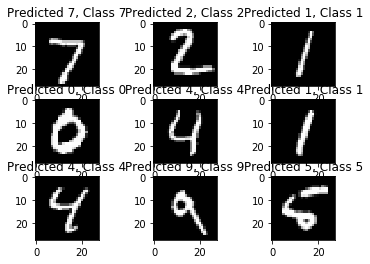

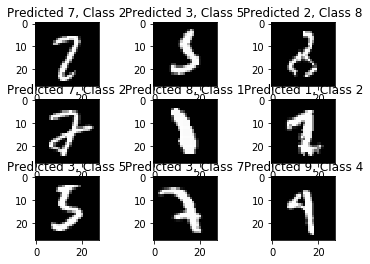

In [15]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))